In [ ]:
# 1. Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

# 2. Load data
df = pd.read_csv("Luxury_Housing_Bangalore (1).csv")

df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [ ]:
# Shape and basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

print("\nMissing values per column:")
print(df.isna().sum())

print("\nStatistical summary (numeric columns):")
df.describe().T

Shape: (101000, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101

,count,mean,std,min,25%,50%,75%,max
Unit_Size_Sqft,90954.0,5972.274765,1783.397836,-1.000000,4477.250000,5990.000000,7497.000000,8999.000000
Connectivity_Score,101000.0,6.992619,1.731757,4.000031,5.494526,6.985805,8.490000,9.999970
Amenity_Score,90910.0,7.503663,1.440758,5.000224,6.260329,7.499123,8.752207,9.999865
Locality_Infra_Score,101000.0,7.498426,1.443128,5.000013,6.247954,7.495614,8.749824,9.999956
Avg_Traffic_Time_Min,101000.0,67.182921,30.271611,15.000000,41.000000,67.000000,93.000000,119.000000


In [ ]:
# Example: drop rows if target (Price) is missing
if "Price" in df.columns:
    df = df.dropna(subset=["Price"])

# For numeric features, fill with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# For categorical features, fill with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
for col in cat_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

df.isna().sum()

/tmp/ipython-input-3388793337.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3388793337.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
Property_ID,0
Micro_Market,0
Project_Name,0
Developer_Name,0
Unit_Size_Sqft,0
Configuration,0
Ticket_Price_Cr,0
Transaction_Type,0
Buyer_Type,0
Purchase_Quarter,0


In [ ]:
print(df.columns)

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')


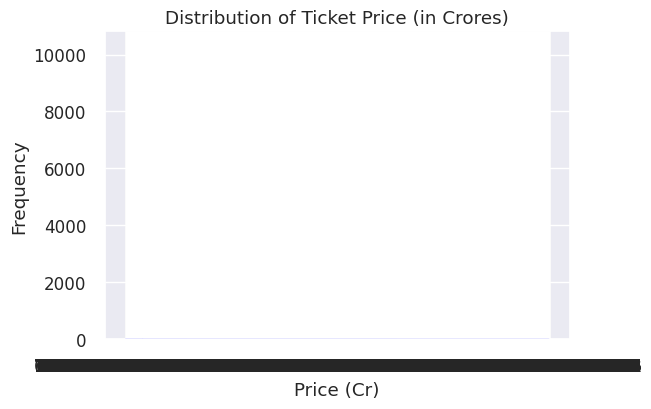

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Ticket_Price_Cr'], kde=True, color='blue')
plt.title("Distribution of Ticket Price (in Crores)")
plt.xlabel("Price (Cr)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['Ticket_Price_Cr'] = pd.to_numeric(df['Ticket_Price_Cr'], errors='coerce')
df = df.dropna(subset=['Ticket_Price_Cr'])

In [ ]:
df = df[df['Ticket_Price_Cr'] < df['Ticket_Price_Cr'].quantile(0.99)]

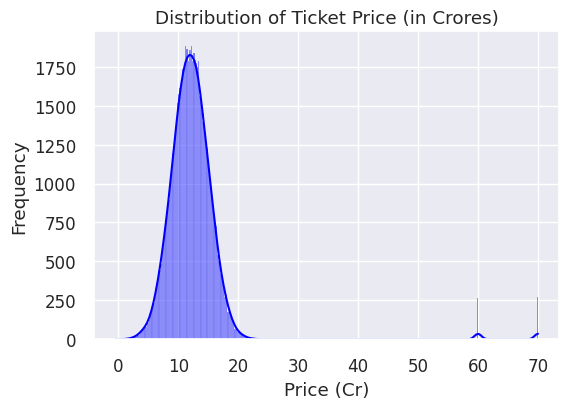

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Ticket_Price_Cr'], kde=True, color='blue')
plt.title("Distribution of Ticket Price (in Crores)")
plt.xlabel("Price (Cr)")
plt.ylabel("Frequency")
plt.show()

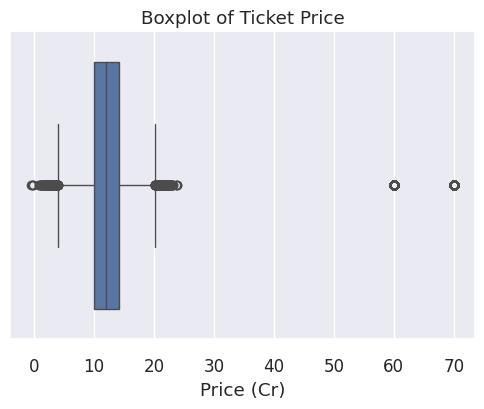

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Ticket_Price_Cr'])
plt.title("Boxplot of Ticket Price")
plt.xlabel("Price (Cr)")
plt.show()

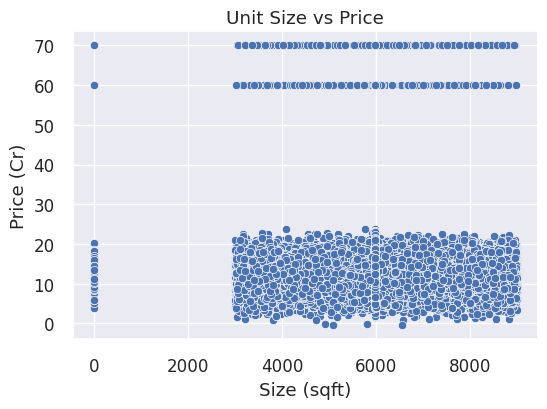

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Unit_Size_Sqft', y='Ticket_Price_Cr')
plt.title("Unit Size vs Price")
plt.xlabel("Size (sqft)")
plt.ylabel("Price (Cr)")
plt.show()

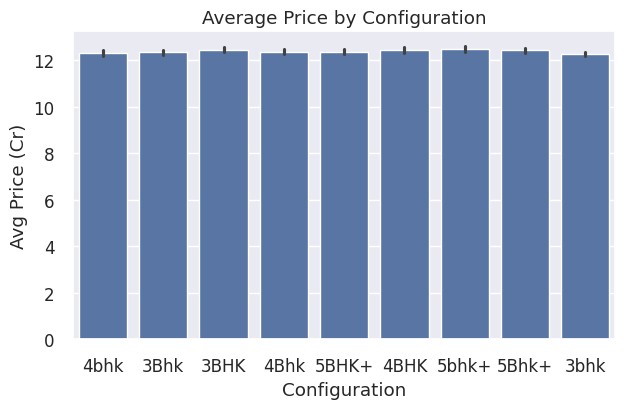

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Configuration', y='Ticket_Price_Cr', estimator='mean')
plt.title("Average Price by Configuration")
plt.ylabel("Avg Price (Cr)")
plt.show()

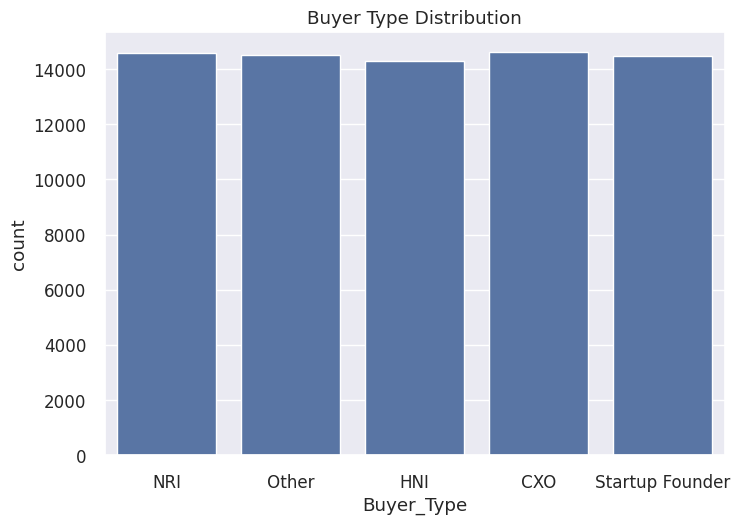

In [ ]:
sns.countplot(data=df, x='Buyer_Type')
plt.title("Buyer Type Distribution")
plt.show()

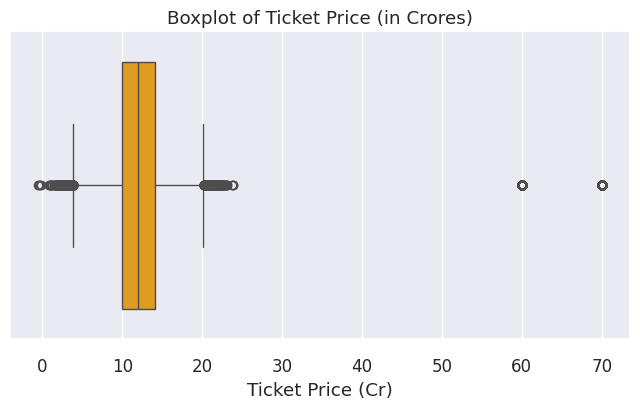

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Ticket_Price_Cr'], color='orange')
plt.title("Boxplot of Ticket Price (in Crores)")
plt.xlabel("Ticket Price (Cr)")
plt.show()

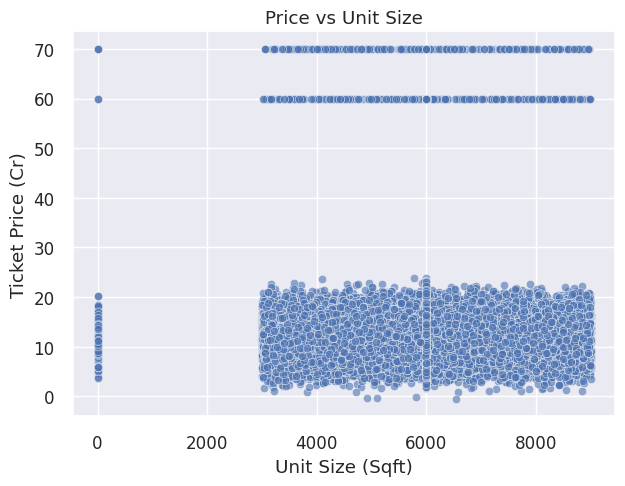

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Unit_Size_Sqft', y='Ticket_Price_Cr', data=df, alpha=0.6)
plt.title("Price vs Unit Size")
plt.xlabel("Unit Size (Sqft)")
plt.ylabel("Ticket Price (Cr)")
plt.show()

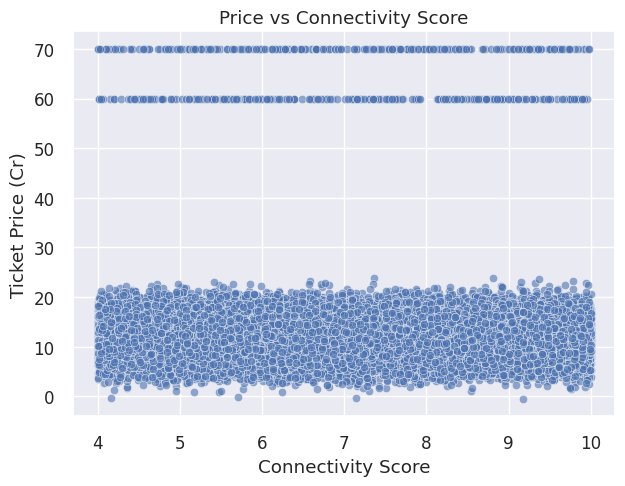

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Connectivity_Score', y='Ticket_Price_Cr', data=df, alpha=0.6)
plt.title("Price vs Connectivity Score")
plt.xlabel("Connectivity Score")
plt.ylabel("Ticket Price (Cr)")
plt.show()

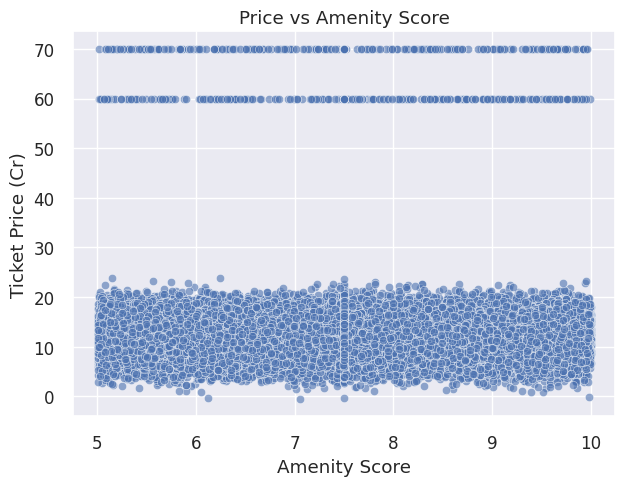

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Amenity_Score', y='Ticket_Price_Cr', data=df, alpha=0.6)
plt.title("Price vs Amenity Score")
plt.xlabel("Amenity Score")
plt.ylabel("Ticket Price (Cr)")
plt.show()

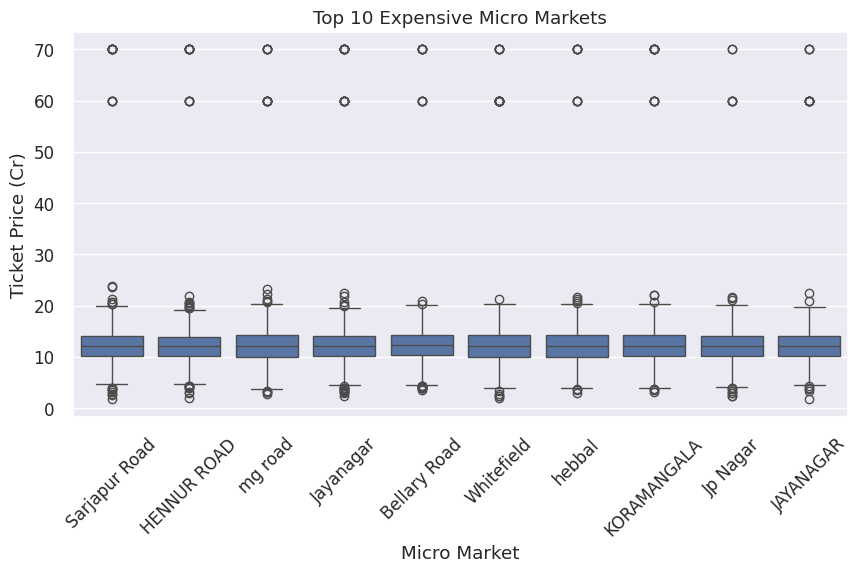

In [ ]:
# Calculate median price per micro market
market_median = df.groupby('Micro_Market')['Ticket_Price_Cr'].median().sort_values(ascending=False)

# Select top 10
top10_markets = market_median.head(10).index
df_top10 = df[df['Micro_Market'].isin(top10_markets)]

plt.figure(figsize=(10,5))
sns.boxplot(x='Micro_Market', y='Ticket_Price_Cr', data=df_top10)
plt.title("Top 10 Expensive Micro Markets")
plt.xlabel("Micro Market")
plt.ylabel("Ticket Price (Cr)")
plt.xticks(rotation=45)
plt.show()

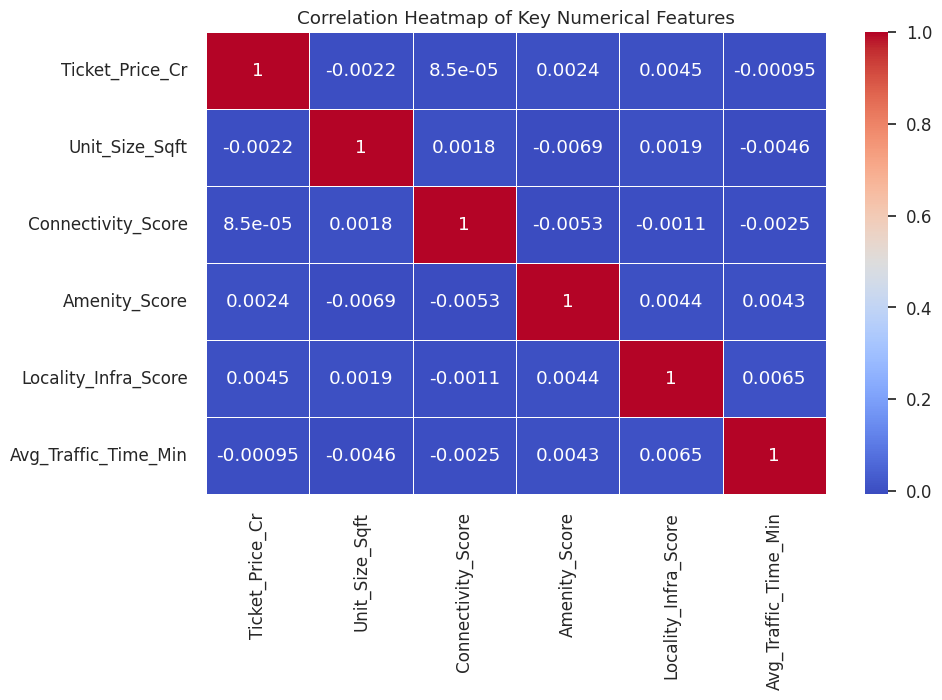

In [ ]:
plt.figure(figsize=(10,6))
corr = df[['Ticket_Price_Cr', 'Unit_Size_Sqft', 'Connectivity_Score', 'Amenity_Score',
           'Locality_Infra_Score', 'Avg_Traffic_Time_Min']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Key Numerical Features")
plt.show()